# Análisis exploratorio de Datos (EDA)
* Parte 1:
1) Análisis de las características
2) Encontrar cualquier relacion o tendencia considerando múltiples caracteristicas

* Parte 2:
1) Agregar algunas características
2) Eliminar funciones redundantes
3) Convertir características en forma adecuada para modelar

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# inline: Para que los gráficos aparezcan en la misma fila
%matplotlib inline

In [60]:
data = pd.read_csv('train_titanic.csv')

In [61]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
#variable objetivo: survived (y saber por qué sobrevivieron)
#revisar la cantidad de valores nulos (NaN) dentro de mi DataFrame
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 0, 'Sexo')

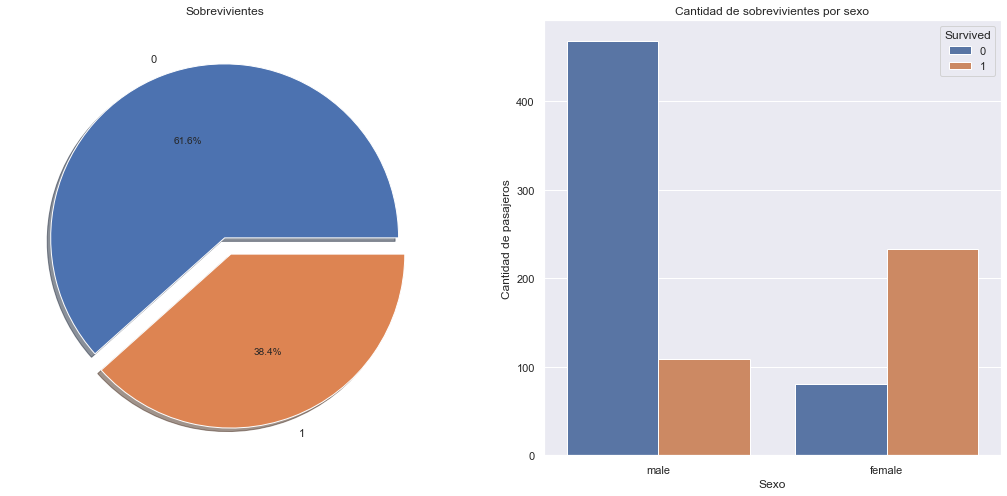

In [63]:
#Se crea gráfico: cantidad de sobrevivientes (0 = muertos / 1 = sobrevivientes)
# Se crean 2 graficos (f y ax)
f, ax = plt.subplots(1,2, figsize = (18,8))

#Contar los pasajeros que sobrevivieron y fallecieron.
#Los datos se muestran en grafico de torta (plot.pie)
# explode: separa un poco el grafico
# shadow: sombrea el grafico
data['Survived'].value_counts().plot.pie(autopct = '%1.1f%%' , ax = ax[0], explode = [0, 0.1], shadow = True)

# cambiar titulos al grafico 1
ax[0].set_title('Sobrevivientes')
# borrar el label del eje y
ax[0].set_ylabel('')


##Grafico 2: 
# 'Sex' en el eje x
# hue: cómo se van a agrupar los datos
sns.countplot('Sex', hue = 'Survived', data = data, ax  = ax[1])
ax[1].set_title('Cantidad de sobrevivientes por sexo')
ax[1].set_ylabel('Cantidad de pasajeros')
ax[1].set_xlabel('Sexo')


## Analizando los gráficos, la cantidad de mujeres que sobrevivieron fue mayor a la de hombres

# Análisis de Características

Caracteristicas categóricas

Una variable categorica es aquella que tiene dos o más categorías y cada valor en esa categoría puede clasificarse por ellas. Por ejemplo, el género es una variable categórica que tiene dos categorías (masculina y femenina). No podemos dar ningún orden a tales variables. También se conocen como variables nominales.

* **Categorical Features in the dataset: Sex**

Características ordinales

Una variable ordinal es similar a los valores categóricos, pero la diferencia entre ellos es que podemos tener una ordenación u ordenacion relativa entre los valores. Por ejemplo: si tenemos una característica como Altura con valores Alto, Medio, Corto, entonces Altura es una variable ordinal. Aquí podemos tener una ordenación relativa en la variable.

* **Ordinal Features in the dataset: PClass**

Características continua:

Se dice que una característica es continua si puede tomar entre dos puntos o entre los valores mínimos o máximos en la columna de características.

* **Continuos Features in the dataset: Age**

# Análisis de Características

### Analizando variable sexo categórica

In [64]:
# Contar la cantidad total de Pasajeros: contando el ID
data['PassengerId'].count()

891

In [65]:
# Contar cuantas personas sobrevivieron de sexo masculino y femenino
# 0 = fallecidos
# 1 = sobrevivientes
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [66]:
# agrupar según sexo y supervivencia
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex'>

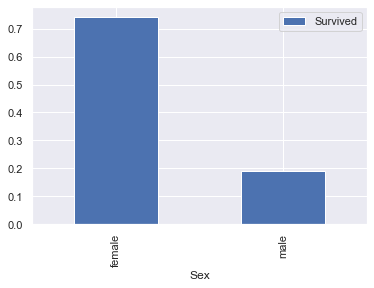

In [67]:
#Gráfico con el promedio de mujeres y hombres que sobrevivieron

# mean = el promedio
# plot = el grafico
# bar = de barras
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

# Según el gráfico, más del 70% de las mujeres (tasa de supervivencia), 
# sobrevivieron y solo cerca un 20% de los hombres sobrevivieron

### Analizando variable ordinal PClass (Clase del Pasajero)

In [68]:
# Grafico cruzado: cruzar datos
# margins=True , para mostrar el total (la suma) de las clases en otra columna
# style.background_gradient: para detallar con color las mayores y menores cantidades
pd.crosstab(data['Pclass'], data['Survived'], margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 0, 'Clases')

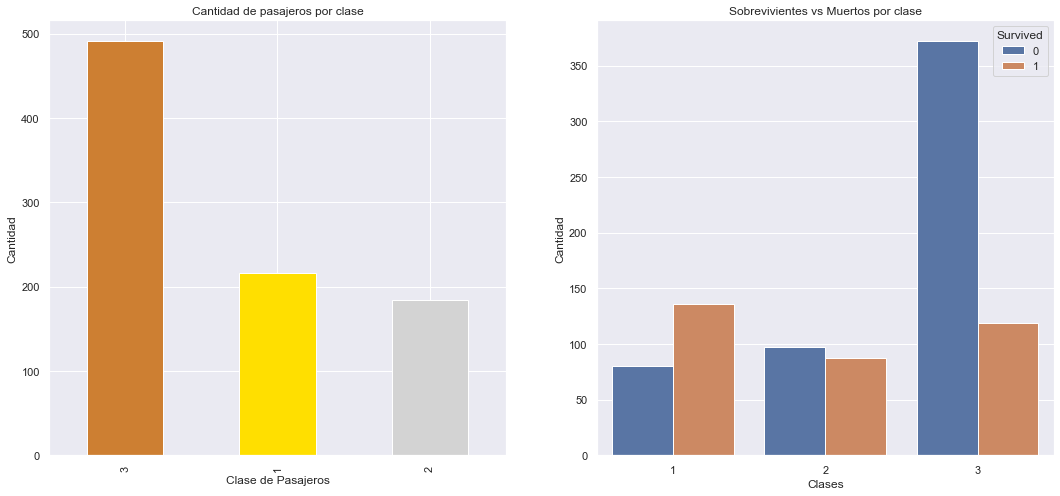

In [69]:
# Graficos: Cantidad de pasajeros por clase (cuantos vivieron y cuantos murieron por clase)

# En una fila, dos graficos de tamaño 18x8
f, ax = plt.subplots(1,2, figsize = (18,8))

# primer grafico de barras: cantidad de pasajeros por clase
# ax = decir la posicion del grafico ( 0 es a la izquierda)
data['Pclass'].value_counts().plot.bar(ax = ax[0], color= ['#CD7F32', '#FFDF00', '#D3D3D3'])

# Cambiar titulo del grafico
ax[0].set_title('Cantidad de pasajeros por clase')

# Nombrar ejes del grafico
ax[0].set_ylabel('Cantidad')
ax[0].set_xlabel('Clase de Pasajeros')

# Usando Seaborn
sns.countplot('Pclass', hue='Survived', data= data, ax=ax[1])
ax[1].set_title('Sobrevivientes vs Muertos por clase')
ax[1].set_ylabel('Cantidad')
ax[1].set_xlabel('Clases')

# En primera y segunda clase hubo una prioridad en el rescate, no así en la tercera clase.
# En tercera clase, solo sobrevivió un 25% de los pasajeros
# En primera clase, aproximadamente un 60% de pasajeros sobrevivieron
# En segunda clase, un 50% de los pasajeros sobrevivieron

# Por lo tanto, la clase del pasajero fue una caracteristica importante en el proceso de supervivencia


### Analizar la tasa de supervivencia según sexo y clase

In [70]:
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap='Blues')

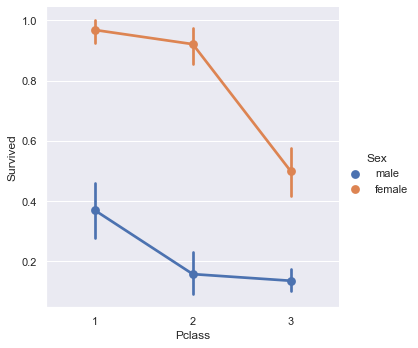

In [71]:
sns.set_theme(style="darkgrid")
sns.factorplot('Pclass', 'Survived', hue='Sex', data = data)
## factorplot (DEPRECATED), usar pointplot

## La tasa de supervivencia de las mujeres en relación al sexo y clase, si fue importante a la hora del rescate
## Por otro lado, independiente de la clase, las mujeres siempre tuvieron prioridad al momento del rescate

### Analizando el pasaje (característica continua)

In [72]:
print("El pasaje más caro: ", data['Fare'].max()) ## Fare es el dato del precio del pasaje
print("El pasaje más barato: ", data['Fare'].min())

El pasaje más caro:  512.3292
El pasaje más barato:  0.0


Text(0.5, 1.0, 'Precios de pasajes de Tercera Clase')

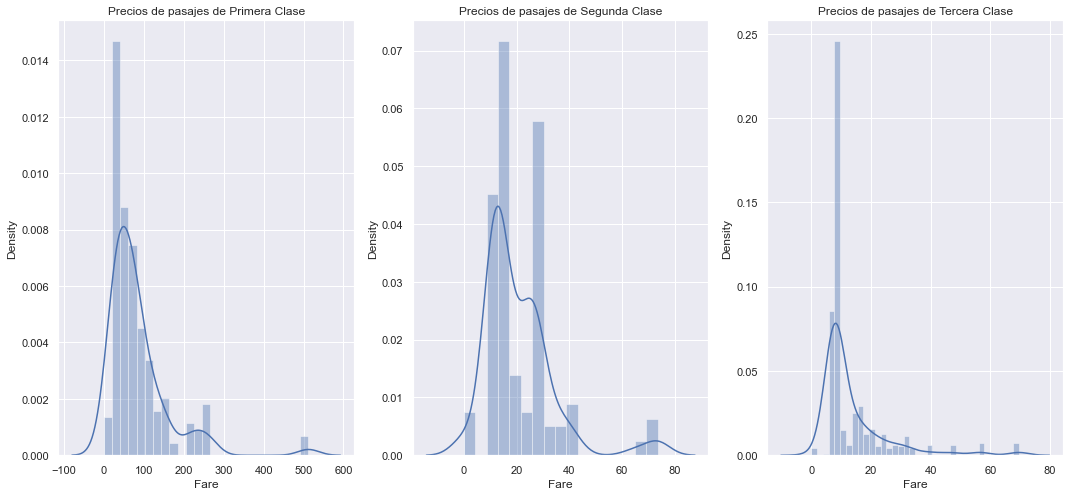

In [73]:
## Distribucion de los precios del pasaje segun las clases (grafico de frecuencia)
f, ax = plt.subplots(1, 3, figsize = (18,8))

# Grafico de frecuencai (primera clase)
sns.distplot( data[data['Pclass'] == 1 ]['Fare'], ax = ax[0])
ax[0].set_title('Precios de pasajes de Primera Clase')

# Grafico de frecuencai (segunda clase)
sns.distplot( data[data['Pclass'] == 2 ]['Fare'], ax = ax[1])
ax[1].set_title('Precios de pasajes de Segunda Clase')

# Grafico de frecuencai (tercera clase)
sns.distplot( data[data['Pclass'] == 3 ]['Fare'], ax = ax[2])
ax[2].set_title('Precios de pasajes de Tercera Clase')

## Precios de primera clase desde los 100 mil dolares
## Precios de segunda clase entre 10 mil y 40 mil dolares
## Precios de tercera clase desde los 10 mil y 20 mil dolares

### Limpieza de datos

* Convertir algunas variables continuas en rangos (edad y precio del pasaje)
* Convertir valores String en valores numéricos
* Eliminar características innecesarias
* Corregir valores nulos

* **Problema con la característica de edad:**

In [74]:
## Agrupacion de información --> Binning o Normalización

# Crea una columna "rango_de_edad"
data['rango_de_edad'] = 0

data.loc[data['Age'] <= 16, 'rango_de_edad'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'rango_de_edad'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'rango_de_edad'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'rango_de_edad'] = 3
data.loc[data['Age'] > 64, 'rango_de_edad'] = 4


In [75]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_de_edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [76]:
# Comprobar el numero de pasajeros en cada rango
data['rango_de_edad'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,rango_de_edad
1,346
0,277
2,188
3,69
4,11


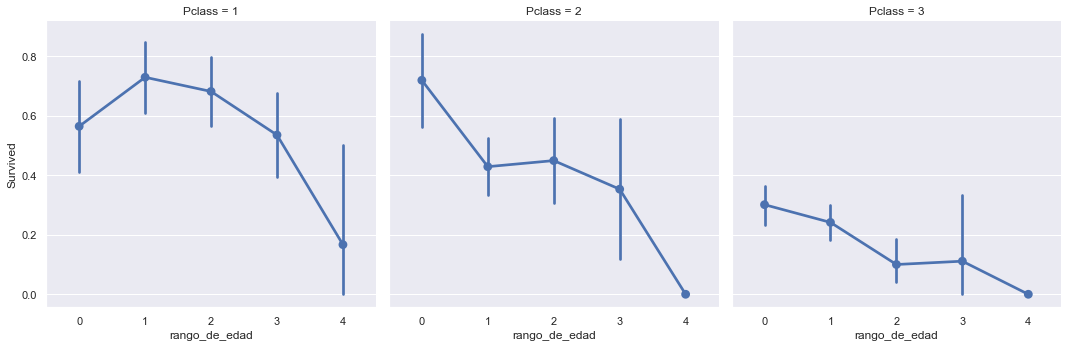

In [77]:
# Gráfico para ver por el rango de edad, la supervivencia
sns.factorplot('rango_de_edad', 'Survived', data = data, col = 'Pclass')

# La tasa de supervivencia disminuye a medida que aumenta la edad, independiente de la clase en la que viajó el pasajero

* **Problemas con la característica del pasaje:**

In [80]:
# qcut -> permite dividir en rangos o intervalos una variable numérica

# El precio del pasaje se divide en 4 tramos
data['rango_pasaje'] = pd.qcut(data['Fare'], 4)

In [81]:
# Se agrupa la variable rango pasaje combinandola con la variable Survived PARA OBTENER UN RANGO
# mean ---> obtener el promedio de registros de cada categoria (tambien se puede aplicar funciones sum(), count(), entre otras)
data.groupby(['rango_pasaje'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'Blues')

,Survived
rango_pasaje,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [82]:
# ACA SE USA EL RANGO DE PRECIOS que se creó, para crear la CATEGORIA_PASAJE
data['categoria_pasaje'] = 0
data.loc[ data['Fare'] <= 7.91 , 'categoria_pasaje'] = 0
data.loc[(data['Fare'] >7.91) & (data['Fare'] <= 14.454) , 'categoria_pasaje'] = 1
data.loc[(data['Fare'] >14.454) & (data['Fare'] <= 31.0) , 'categoria_pasaje'] = 2
data.loc[(data['Fare'] >31.0) & (data['Fare'] <= 512.329) , 'categoria_pasaje'] = 3

<AxesSubplot:xlabel='categoria_pasaje', ylabel='Survived'>

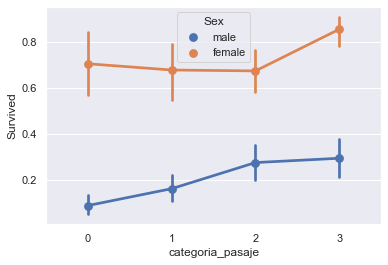

In [84]:
# hue = como se van a agrupar los datos
sns.pointplot('categoria_pasaje', 'Survived', data = data, hue = 'Sex')

# Mientras aumenta la categoria del pasaje, aumenta la supervivencia